# <center>Mini Project 2_Plotting Covid-19 cases and deaths by state with best fit curves
                                       September 10, 2022
    
Mini Project 2 EDA-CURVE FITTING
    
<h4>Plotting United_States_COVID-19_Cases_and_Deaths_by_State_over_Time
with best fit curves.

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit                  #for curve fitting.

In [3]:
# Csv Data
csv_data_path = 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'        #(URL)location path of the file

In [5]:
covid19 = pd.read_csv(csv_data_path)   #reading the data file means import the .csv file

In [6]:
df = pd.DataFrame(covid19)
df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,"621,273","470,516","150,757","19,414","6,964","7,162",NaN,NaN,21,4,01/15/2022 02:59:30 PM,Agree,NaN
1,01/02/2022,AS,11,NaN,NaN,0,0,0,NaN,NaN,0,0,01/03/2022 03:18:16 PM,NaN,NaN
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,12/08/2021 12:00:00 AM,Agree,Agree
4,05/09/2021,PW,0,NaN,NaN,0,0,0,NaN,NaN,0,0,05/10/2021 02:15:36 PM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,05/28/2020,IA,"18,585",NaN,NaN,228,0,506,NaN,NaN,14,0,05/29/2020 02:19:55 PM,Not agree,Not agree
50357,06/07/2020,SD,"5,438",NaN,NaN,71,0,65,64,1,0,1,06/08/2020 02:55:08 PM,NaN,Agree
50358,04/30/2021,SD,"122,660",NaN,NaN,128,17,"1,967","1,601",366,5,1,05/01/2021 01:43:22 PM,NaN,Agree
50359,04/06/2020,NM,686,NaN,NaN,62,0,12,NaN,NaN,0,0,04/08/2020 12:00:00 AM,NaN,Not agree


In [7]:
df.shape           #Total Number of rows and columns.

(50361, 15)

In [8]:
df.columns      #Showing the all headers of the data set

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [10]:
df.head()      #it display first five rows of the DataSet.

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,"621,273","470,516","150,757","19,414","6,964","7,162",NaN,NaN,21,4,01/15/2022 02:59:30 PM,Agree,NaN
1,01/02/2022,AS,11,NaN,NaN,0,0,0,NaN,NaN,0,0,01/03/2022 03:18:16 PM,NaN,NaN
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,12/08/2021 12:00:00 AM,Agree,Agree
4,05/09/2021,PW,0,NaN,NaN,0,0,0,NaN,NaN,0,0,05/10/2021 02:15:36 PM,NaN,NaN


In [17]:
df.tail()           #it display last five rows of the DataSet. 

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
50356,05/28/2020,IA,"18,585",NaN,NaN,228,0,506,NaN,NaN,14,0,05/29/2020 02:19:55 PM,Not agree,Not agree
50357,06/07/2020,SD,"5,438",NaN,NaN,71,0,65,64,1,0,1,06/08/2020 02:55:08 PM,NaN,Agree
50358,04/30/2021,SD,"122,660",NaN,NaN,128,17,"1,967","1,601",366,5,1,05/01/2021 01:43:22 PM,NaN,Agree
50359,04/06/2020,NM,686,NaN,NaN,62,0,12,NaN,NaN,0,0,04/08/2020 12:00:00 AM,NaN,Not agree
50360,03/13/2021,IA,"342,495",NaN,NaN,425,77,"5,633",NaN,NaN,3,3,03/14/2021 01:53:25 PM,Not agree,Not agree


In [12]:
df.info()       #All the information of dataset is displayed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50361 entries, 0 to 50360
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  50361 non-null  object
 1   state            50361 non-null  object
 2   tot_cases        50361 non-null  object
 3   conf_cases       27885 non-null  object
 4   prob_cases       27813 non-null  object
 5   new_case         50361 non-null  object
 6   pnew_case        46659 non-null  object
 7   tot_death        50361 non-null  object
 8   conf_death       27448 non-null  object
 9   prob_death       27448 non-null  object
 10  new_death        50361 non-null  object
 11  pnew_death       46691 non-null  object
 12  created_at       50361 non-null  object
 13  consent_cases    41966 non-null  object
 14  consent_deaths   42810 non-null  object
dtypes: object(15)
memory usage: 2.9+ MB


In [13]:
df.describe()   #It Show the all stats of your dataset.

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
count,50361,50361,50361,27885,27813,50361,46659,50361,27448,27448,50361,46691,50361,41966,42810
unique,860,60,37784,22898,16503,7568,2964,16880,12621,3872,505,320,1913,2,2
top,01/14/2022,AL,0,0,0,0,0,0,0,0,0,0,03/26/2020 04:22:39 PM,Agree,Agree
freq,60,860,3971,766,6400,9929,21637,6426,2057,7185,18040,33153,2888,30030,29468


In [15]:
df.isnull()      #showing which have null value or not.

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
1,False,False,False,True,True,False,False,False,True,True,False,False,False,True,True
2,False,False,False,True,True,False,True,False,True,True,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False
50357,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
50358,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
50359,False,False,False,True,True,False,False,False,True,True,False,False,False,True,False


In [16]:
df.isnull().sum()     #It sum the null values of dataset. Which show how many null values in a column.(means>not a number value)

submission_date        0
state                  0
tot_cases              0
conf_cases         22476
prob_cases         22548
new_case               0
pnew_case           3702
tot_death              0
conf_death         22913
prob_death         22913
new_death              0
pnew_death          3670
created_at             0
consent_cases       8395
consent_deaths      7551
dtype: int64

In [26]:
mp = df[df['state'] == 'MP']  #creating dataframe from previous dataframe with a single parameter. 
mp                              #which is (state) now the certain state data is display.[which is MP state dataset]

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
3,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,12/08/2021 12:00:00 AM,Agree,Agree
11,03/16/2020,MP,0,0,0,0,0,0,0,0,0,0,03/18/2020 12:00:00 AM,Agree,Agree
26,02/28/2022,MP,"9,724","9,724",0,174,0,30,30,0,0,0,03/01/2022 03:28:54 PM,Agree,Agree
36,11/16/2020,MP,102,102,0,0,0,2,2,0,0,0,11/18/2020 12:00:00 AM,Agree,Agree
37,01/27/2020,MP,0,0,0,0,0,0,0,0,0,0,01/29/2020 12:00:00 AM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46922,06/17/2020,MP,30,30,0,0,0,2,2,0,0,0,06/19/2020 12:00:00 AM,Agree,Agree
46943,08/13/2020,MP,49,49,0,0,0,2,2,0,0,0,08/15/2020 12:00:00 AM,Agree,Agree
46967,07/19/2020,MP,37,37,0,0,0,2,2,0,0,0,07/21/2020 12:00:00 AM,Agree,Agree
46981,02/15/2021,MP,134,134,0,0,0,2,2,0,0,0,02/17/2021 12:00:00 AM,Agree,Agree


In [28]:
mp.shape           #total no. of rows and column of MP state.

(839, 15)

In [29]:
mp.describe()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
count,839,839,839,839,839,839,839,839,839,839,839,839,839,839,839
unique,839,1,267,267,1,87,1,28,28,1,4,1,835,1,1
top,12/06/2021,MP,0,0,0,0,0,2,2,0,0,0,12/13/2021 03:20:33 PM,Agree,Agree
freq,1,839,68,68,839,573,839,548,548,839,812,839,5,839,839


In [30]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 3 to 46983
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  839 non-null    object
 1   state            839 non-null    object
 2   tot_cases        839 non-null    object
 3   conf_cases       839 non-null    object
 4   prob_cases       839 non-null    object
 5   new_case         839 non-null    object
 6   pnew_case        839 non-null    object
 7   tot_death        839 non-null    object
 8   conf_death       839 non-null    object
 9   prob_death       839 non-null    object
 10  new_death        839 non-null    object
 11  pnew_death       839 non-null    object
 12  created_at       839 non-null    object
 13  consent_cases    839 non-null    object
 14  consent_deaths   839 non-null    object
dtypes: object(15)
memory usage: 55.7+ KB


In [31]:
df.isnull()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
1,False,False,False,True,True,False,False,False,True,True,False,False,False,True,True
2,False,False,False,True,True,False,True,False,True,True,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False
50357,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
50358,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
50359,False,False,False,True,True,False,False,False,True,True,False,False,False,True,False


In [32]:
df.isnull().sum()          #sum of nullvalues of MP state.

submission_date        0
state                  0
tot_cases              0
conf_cases         22476
prob_cases         22548
new_case               0
pnew_case           3702
tot_death              0
conf_death         22913
prob_death         22913
new_death              0
pnew_death          3670
created_at             0
consent_cases       8395
consent_deaths      7551
dtype: int64

In [36]:
tot_cases = np.array((mp['tot_cases'])) #create an array for total no. of cases.

In [35]:
days = np.linspace(0, len(tot_cases),len(tot_cases))     #creating variable name days in which array contain the no. of days from the first day of recording

In [37]:
tot_cases

array(['1,104', '0', '9,724', '102', '0', '170', '272', '265', '183',
       '129', '154', '224', '0', '3,905', '144', '30', '267', '31', '33',
       '100', '70', '289', '133', '0', '190', '4,564', '10,734', '649',
       '221', '92', '8', '9,265', '47', '187', '183', '128', '198', '40',
       '56', '164', '133', '36', '157', '250', '0', '144', '11,153', '0',
       '1,774', '6,784', '3,802', '33', '143', '157', '2,422', '692',
       '6,102', '22', '58', '54', '57', '1,182', '22', '31', '170', '14',
       '0', '0', '133', '4,118', '1,514', '307', '86', '3,518', '3,208',
       '47', '11,203', '143', '100', '266', '21', '96', '438', '10,777',
       '59', '70', '3,698', '190', '30', '21', '143', '14', '22',
       '10,229', '5,314', '181', '160', '198', '10,074', '37', '134', '0',
       '3,598', '132', '8,882', '210', '40', '384', '69', '290', '134',
       '958', '58', '143', '248', '162', '0', '16', '54', '4,119',
       '2,321', '31', '2,641', '30', '464', '10,379', '159', '258'

In [40]:
len(tot_cases)

839

In [39]:
days

array([  0.        ,   1.00119332,   2.00238663,   3.00357995,
         4.00477327,   5.00596659,   6.0071599 ,   7.00835322,
         8.00954654,   9.01073986,  10.01193317,  11.01312649,
        12.01431981,  13.01551313,  14.01670644,  15.01789976,
        16.01909308,  17.0202864 ,  18.02147971,  19.02267303,
        20.02386635,  21.02505967,  22.02625298,  23.0274463 ,
        24.02863962,  25.02983294,  26.03102625,  27.03221957,
        28.03341289,  29.03460621,  30.03579952,  31.03699284,
        32.03818616,  33.03937947,  34.04057279,  35.04176611,
        36.04295943,  37.04415274,  38.04534606,  39.04653938,
        40.0477327 ,  41.04892601,  42.05011933,  43.05131265,
        44.05250597,  45.05369928,  46.0548926 ,  47.05608592,
        48.05727924,  49.05847255,  50.05966587,  51.06085919,
        52.06205251,  53.06324582,  54.06443914,  55.06563246,
        56.06682578,  57.06801909,  58.06921241,  59.07040573,
        60.07159905,  61.07279236,  62.07398568,  63.07

In [41]:
len(days)

839

In [43]:
d= {
    "days":pd.Series(days,index=None),
    "tot_cases":pd.Series(tot_cases,index=None)
}

In [44]:
d

{'days': 0        0.000000
 1        1.001193
 2        2.002387
 3        3.003580
 4        4.004773
           ...    
 834    834.995227
 835    835.996420
 836    836.997613
 837    837.998807
 838    839.000000
 Length: 839, dtype: float64,
 'tot_cases': 0      1,104
 1          0
 2      9,724
 3        102
 4          0
        ...  
 834       30
 835       49
 836       37
 837      134
 838        0
 Length: 839, dtype: object}

In [47]:
mpp = pd.DataFrame(d) 
mpp

,days,tot_cases
0,0.000000,"1,104"
1,1.001193,0
2,2.002387,"9,724"
3,3.003580,102
4,4.004773,0
...,...,...
834,834.995227,30
835,835.996420,49
836,836.997613,37
837,837.998807,134


In [48]:
mpp['tot_cases'] = mpp['tot_cases'].str.replace(',','').astype(float) #replacing comma(,) with blank()space and its datatype is float

In [119]:
mpp['tot_cases']              #now the commas is replaced.

0      1104.0
1         0.0
2      9724.0
3       102.0
4         0.0
        ...  
834      30.0
835      49.0
836      37.0
837     134.0
838       0.0
Name: tot_cases, Length: 839, dtype: float64

In [120]:
mpp

,days,tot_cases
0,0.000000,1104.0
1,1.001193,0.0
2,2.002387,9724.0
3,3.003580,102.0
4,4.004773,0.0
...,...,...
834,834.995227,30.0
835,835.996420,49.0
836,836.997613,37.0
837,837.998807,134.0


In [51]:
mpp['days'][:200]

0        0.000000
1        1.001193
2        2.002387
3        3.003580
4        4.004773
          ...    
195    195.232697
196    196.233890
197    197.235084
198    198.236277
199    199.237470
Name: days, Length: 200, dtype: float64

In [107]:
def exp_fit(x,a,b,c):
    y = a * np.exp (b * x) + c                  #define the fucntion for curve fitting.
    return y                      

In [126]:
fit = curve_fit(exp_fit, mpp["days"][:160], mpp["tot_cases"][:160], p0 = [0.005, 0.03, 5])
fit_eq = fit[0][0]*np.exp(fit[0][1]*mpp["days"][:160])+fit[0][2] #call the fitting function

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


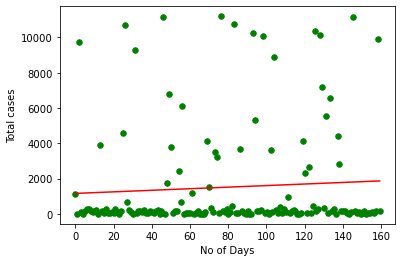

In [127]:
#Plotting
fig = plt.figure()
ax = fig.subplots()                                                         #normal plot
ax.scatter(mpp['days'][:160],mpp['tot_cases'][:160], color = 'g', s = 30)
ax.plot(mpp['days'][:160],fit_eq, color = 'r',  alpha = 1)                      
ax.set_ylabel('Total cases')                                               #curve fitting plot 
ax.set_xlabel('No of Days')
plt.show()

### <center> ) ) APPLYING AN RANDOM EXPONENTIAL DISTRIBUTION FIT TO A HISTOGRAM ( (

In [11]:
data = np.random.exponential(5, size=10000)           #generating a random exponential distribution
hist = np.histogram(data, bins="auto")[0]            #generating a histogram from the exponential distribution
x = np.arange(0, len(hist), 1)           


def exp_fit(x,a,b):                #defining a decaying exponential function
    y = a*np.exp(-b*x)
    return y
x_fit = x + x[1]/2         #the point of the fit will be positioned at the center of the bins
fit_ = curve_fit(exp_fit,x_fit,hist)         # calling the fit function
fit_eq = fit_[0][0]*np.exp(-fit_[0][1]*x_fit)

C:\Users\CODERS READY\AppData\Local\Temp\ipykernel_1544\3627748303.py:7: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*x)
C:\Users\CODERS READY\AppData\Local\Temp\ipykernel_1544\3627748303.py:7: RuntimeWarning: overflow encountered in multiply
  y = a*np.exp(-b*x)


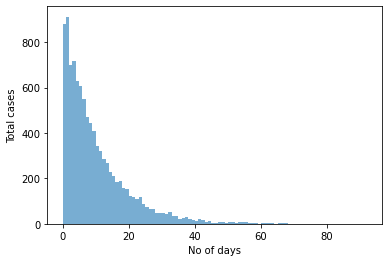

In [12]:
plt.bar(x,hist, alpha = 0.6, align = 'edge', width = 1)
plt.ylabel('Total cases')
plt.xlabel('No of days')
plt.show()

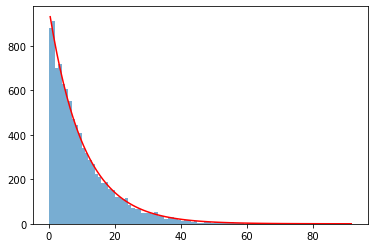

In [13]:
plt.bar(x,hist, alpha = 0.6, align = 'edge', width = 1)
plt.plot(x_fit,fit_eq, color = 'red')
plt.show()